In [7]:
import pandas as pd
import numpy as np
from numpy.random import standard_t
from sklearn.datasets import fetch_lfw_people
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import Image


# A

In [8]:
lfw = fetch_lfw_people(min_faces_per_person=100, resize=0.4)
lfw_data = lfw.data

unique, counts = np.unique(lfw.target, return_counts=True)
for idx, count in zip(unique, counts):
    print(f"{lfw.target_names[idx]}: {count}")

print(f"\ncount of image: {lfw.data.shape[0]}")
print(f"\ncount of pixel: {lfw.data.shape[1]}")
print(f"count of person: {len(lfw.target_names)}")

Colin Powell: 236
Donald Rumsfeld: 121
George W Bush: 530
Gerhard Schroeder: 109
Tony Blair: 144

count of image: 1140

count of pixel: 1850
count of person: 5


# B

(1140, 1850)
(1140, 150)


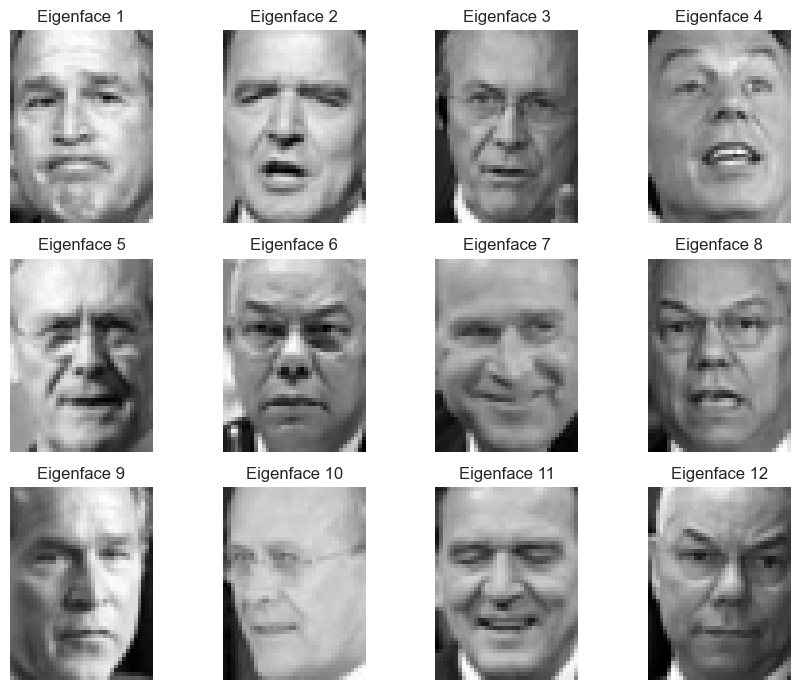

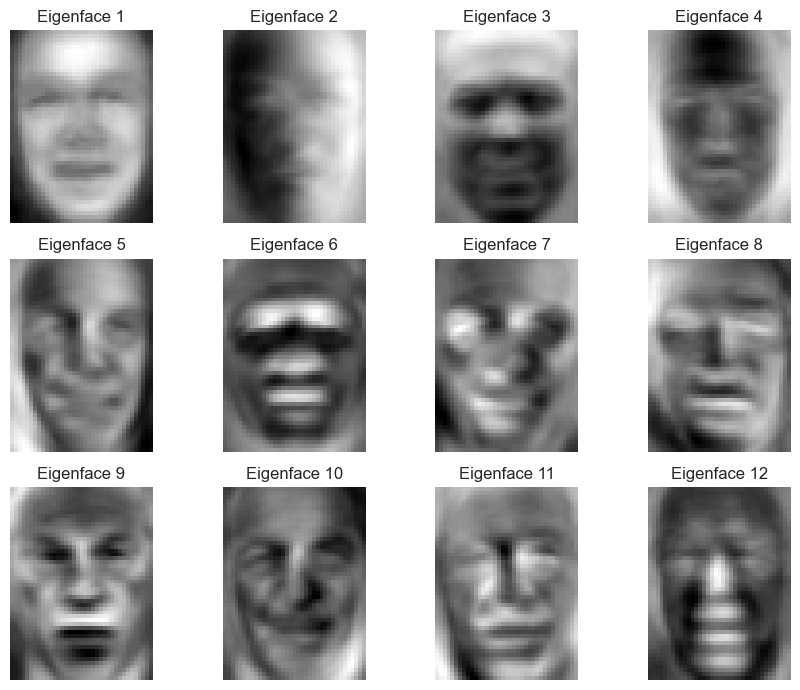

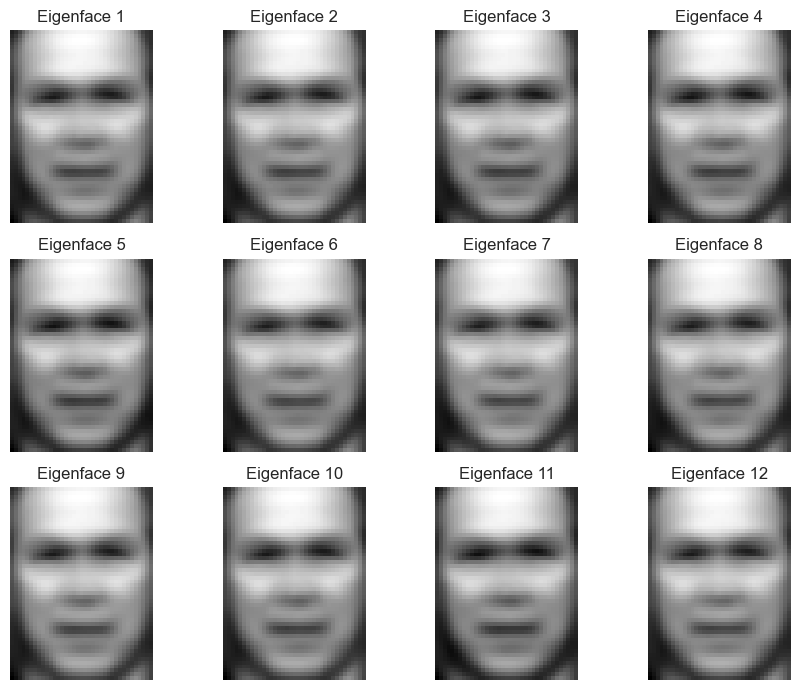

In [9]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(lfw_data)

pca = PCA(n_components=150)
x_pca = pca.fit_transform(x_scaled)

print(lfw_data.shape)
print(x_pca.shape)

X = lfw.data
y = lfw.target
h, w = lfw.images[0].shape

#بدون استاندارد سازی
fig, axes = plt.subplots(3, 4, figsize=(9, 7))
plt.title("without any change")
for i, ax in enumerate(axes.flatten()):
    ax.imshow(lfw_data[i].reshape(h, w), cmap="gray")
    ax.set_title(f"face  {i+1}")
    ax.axis("off")
plt.tight_layout()
plt.show()

#بدون معکوس کردن استاندارد
fig, axes = plt.subplots(3, 4, figsize=(9, 7))
plt.title("with PCA")
for i, ax in enumerate(axes.flatten()):
    ax.imshow(pca.components_[i].reshape(h, w), cmap="gray")
    ax.set_title(f"Eigenface {i+1}")
    ax.axis("off")
plt.tight_layout()
plt.show()

# با معکوس سازی
fig, axes = plt.subplots(3, 4, figsize=(9, 7))
plt.title("with PCA unversed")
for i, ax in enumerate(axes.flatten()):
    eigenface = scaler.inverse_transform(pca.components_[i].reshape(1, -1)).reshape(h, w)
    ax.imshow(eigenface, cmap="gray")
    ax.set_title(f"Eigenface {i+1}")
    ax.axis("off")
plt.tight_layout()
plt.show()